## CNN MODEL FOR WASTE CLASSIFICATION

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import os
from glob import glob
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report, confusion_matrix, precision_recall_curve, roc_curve, auc
import seaborn as sns
import squarify

## LOAD DATASET

In [7]:
# Paths to train and test datasets
train_path = "D:/VSCODE/CNN model waste classification/DATASET/TRAIN"
test_path = "D:/VSCODE/CNN model waste classification/DATASET/TEST"

# Mapping folder names to user-friendly labels
label_mapping = {
    "O": "Organic",
    "R": "Recyclable"
}

# Function to load and process images
def load_data(data_path):
    x_data = []
    y_data = []
    for category in glob(data_path + "/*"):
        label = os.path.basename(category)  # Extract folder name (e.g., 'O', 'R')
        for file in tqdm(glob(category + "/*"), desc=f"Processing {label_mapping[label]} images"):
            try:
                img_array = cv2.imread(file)
                img_array = cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB)
                img_resized = cv2.resize(img_array, (128, 128))  # Resize images for consistency
                x_data.append(img_resized)
                y_data.append(label)  # Use raw label (e.g., 'O', 'R')
            except Exception as e:
                print(f"Error processing file {file}: {e}")
    return np.array(x_data), np.array(y_data)

# Load train and test datasets
print("Loading training data...")
x_train, y_train = load_data(train_path)

print("Loading testing data...")
x_test, y_test = load_data(test_path)

Loading training data...


Processing Recyclable images: 100%|██████████| 9999/9999 [00:04<00:00, 2347.49it/s]


Loading testing data...


Processing Recyclable images: 100%|██████████| 1112/1112 [00:00<00:00, 2301.78it/s]


## PROCESSING DATA

In [3]:
# Preprocessing and augmentation
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2  # 20% validation split
)

# Training and validation data generators
train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    train_path,
    target_size=(128, 128),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

# CNN Model Definition
model = Sequential([
    Conv2D(32, (3, 3), input_shape=(128, 128, 3)),
    Activation('relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(64, (3, 3)),
    Activation('relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3)),
    Activation('relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

Found 18052 images belonging to 2 classes.
Found 4512 images belonging to 2 classes.


C:\Users\deepa\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## TRAIN MODEL

In [4]:
# Train the model
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,
    steps_per_epoch=train_generator.samples // 32,
    validation_steps=val_generator.samples // 32
)


C:\Users\deepa\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
564/564 ━━━━━━━━━━━━━━━━━━━━ 258s 445ms/step - accuracy: 0.7558 - loss: 1.6378 - val_accuracy: 0.7691 - val_loss: 0.5217
Epoch 2/15
  1/564 ━━━━━━━━━━━━━━━━━━━━ 2:25 259ms/step - accuracy: 0.7812 - loss: 0.5439

C:\Users\deepa\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


564/564 ━━━━━━━━━━━━━━━━━━━━ 40s 71ms/step - accuracy: 0.7812 - loss: 0.5439 - val_accuracy: 0.7846 - val_loss: 0.4770
Epoch 3/15
564/564 ━━━━━━━━━━━━━━━━━━━━ 253s 449ms/step - accuracy: 0.8162 - loss: 0.4528 - val_accuracy: 0.8025 - val_loss: 0.5393
Epoch 4/15
564/564 ━━━━━━━━━━━━━━━━━━━━ 41s 72ms/step - accuracy: 0.9062 - loss: 0.3777 - val_accuracy: 0.7990 - val_loss: 0.5341
Epoch 5/15
564/564 ━━━━━━━━━━━━━━━━━━━━ 250s 443ms/step - accuracy: 0.8241 - loss: 0.4315 - val_accuracy: 0.8333 - val_loss: 0.4102
Epoch 6/15
564/564 ━━━━━━━━━━━━━━━━━━━━ 40s 71ms/step - accuracy: 0.7812 - loss: 0.6469 - val_accuracy: 0.8236 - val_loss: 0.4067
Epoch 7/15
564/564 ━━━━━━━━━━━━━━━━━━━━ 253s 448ms/step - accuracy: 0.8299 - loss: 0.4050 - val_accuracy: 0.8149 - val_loss: 0.4771
Epoch 8/15
564/564 ━━━━━━━━━━━━━━━━━━━━ 41s 72ms/step - accuracy: 0.8125 - loss: 0.3788 - val_accuracy: 0.8136 - val_loss: 0.4954
Epoch 9/15
564/564 ━━━━━━━━━━━━━━━━━━━━ 251s 444ms/step - accuracy: 0.8310 - loss: 0.4170 - val

## VISUALIZATION

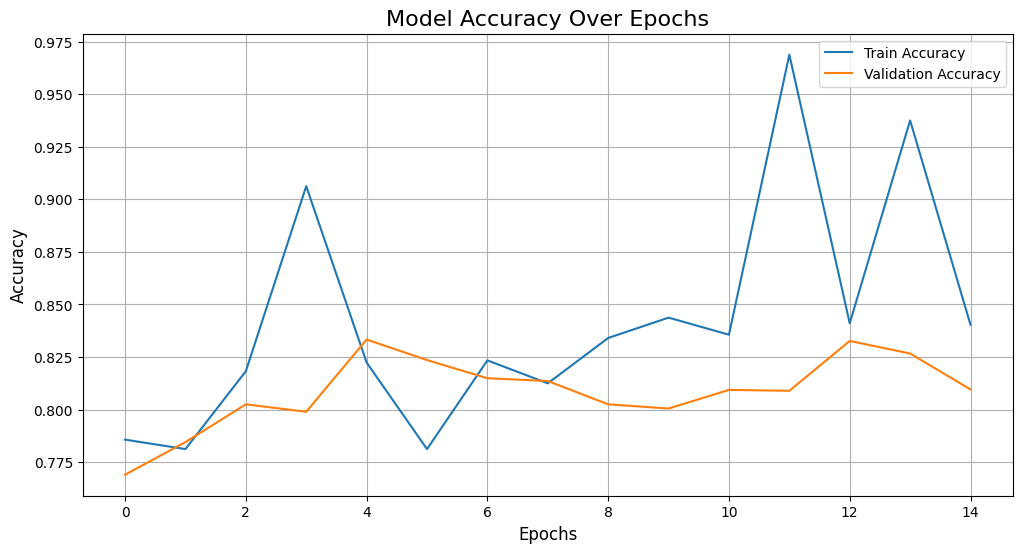

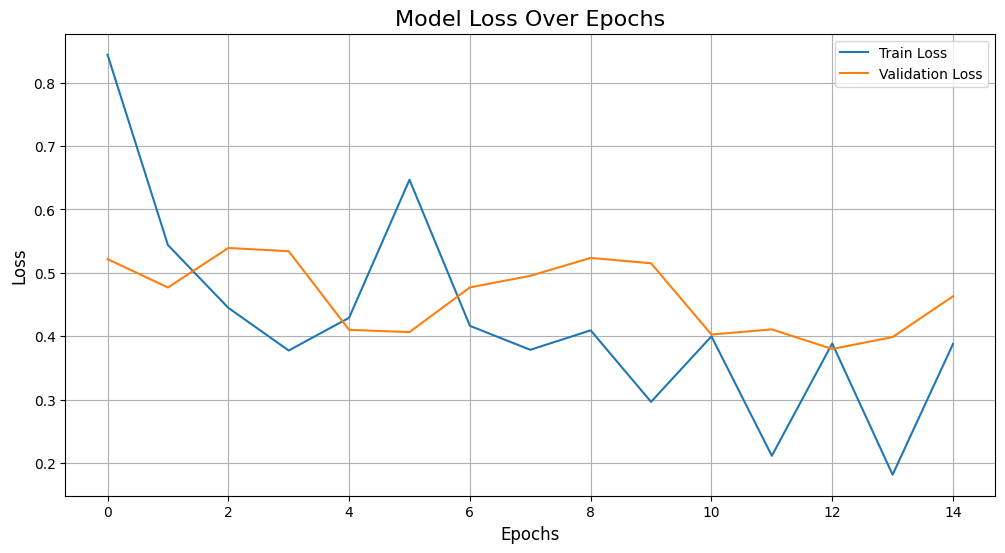

141/141 ━━━━━━━━━━━━━━━━━━━━ 15s 103ms/step


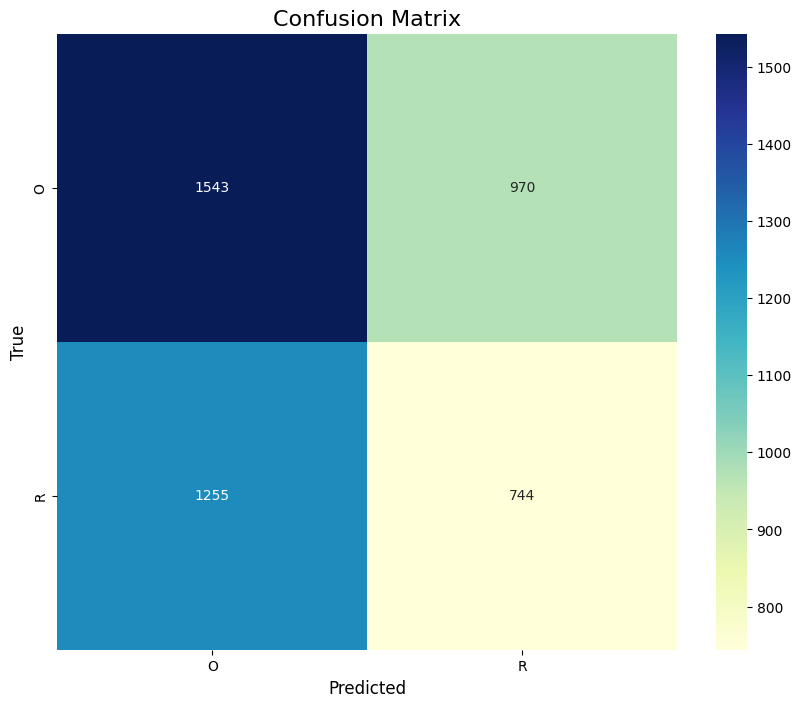

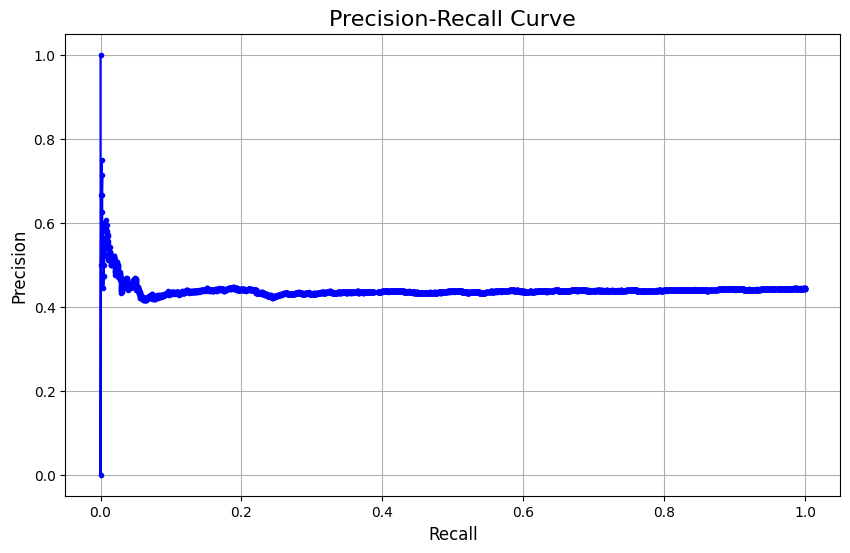

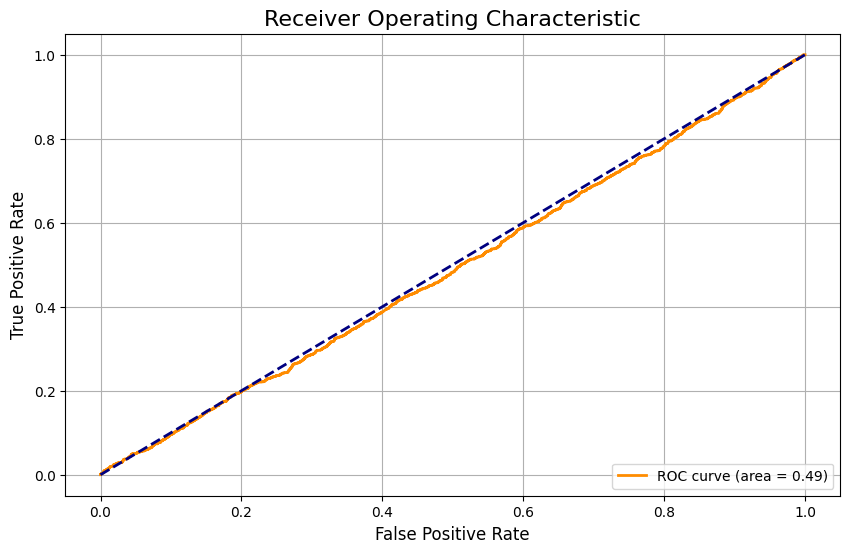

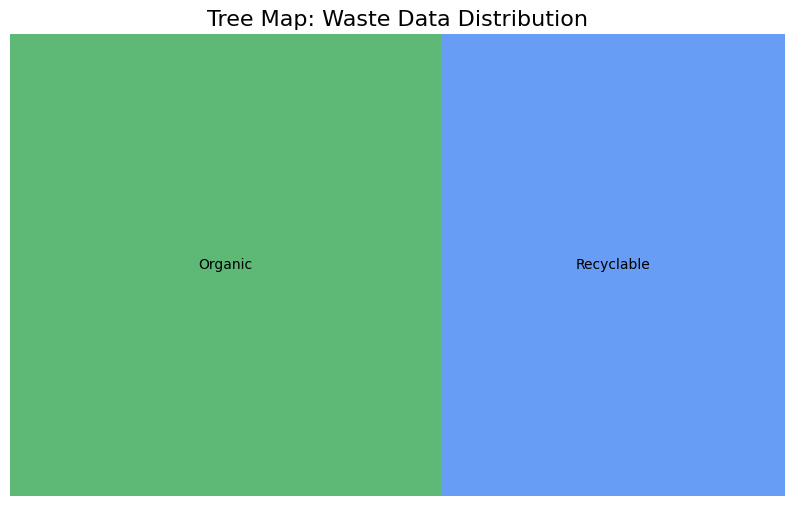

In [8]:
# 1. Line chart for training and validation metrics
plt.figure(figsize=(12, 6))
plt.plot(history.history['accuracy'], label='Train Accuracy', color='#1f77b4')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='#ff7f0e')
plt.title('Model Accuracy Over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Train Loss', color='#1f77b4')
plt.plot(history.history['val_loss'], label='Validation Loss', color='#ff7f0e')
plt.title('Model Loss Over Epochs', fontsize=16)
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid()
plt.show()

# 2. Confusion Matrix (Heat Map)
y_pred = model.predict(val_generator)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = val_generator.classes

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='YlGnBu', xticklabels=val_generator.class_indices.keys(), yticklabels=val_generator.class_indices.keys())
plt.title('Confusion Matrix', fontsize=16)
plt.xlabel('Predicted', fontsize=12)
plt.ylabel('True', fontsize=12)
plt.show()

# 3. Precision-Recall Curve
y_pred_prob = y_pred[:, 1]  # Probabilities for the second class
precision, recall, _ = precision_recall_curve(y_true, y_pred_prob)

plt.figure(figsize=(10, 6))
plt.plot(recall, precision, marker='.', color='blue')
plt.title('Precision-Recall Curve', fontsize=16)
plt.xlabel('Recall', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.grid()
plt.show()

# 4. ROC Curve
fpr, tpr, _ = roc_curve(y_true, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.title('Receiver Operating Characteristic', fontsize=16)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.legend(loc="lower right")
plt.grid()
plt.show()

# 5. Tree Map
train_df = pd.DataFrame({'label': y_train})
sizes = train_df['label'].value_counts()
plt.figure(figsize=(10, 6))
squarify.plot(sizes=sizes, label=[label_mapping[label] for label in sizes.index], alpha=0.8, color=['#34a853', '#4285f4'])
plt.title('Tree Map: Waste Data Distribution', fontsize=16)
plt.axis('off')
plt.show()